## 서울시에서 공개한 코로나19 발생동향 분석
* http://www.seoul.go.kr/coronaV/coronaStatus.do

## 분석에 사용할 Pandas 주요기능
* Pandas cheat sheet 를 함께 보세요! : [Pandas_Cheat_Sheet.pdf](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

* 파일 불러오기
    * to_csv("파일명", index=False) : csv 파일로 저장하기
    * read_csv("파일명") : csv 파일 불러오기
    
* Pandas를 통한 파일 저장과 불러오기
    * shape를 통한 행과 열의 수 보기
    * head, tail, sample 을 통한 일부 데이터 가져오기
    
* DataFrame의 info(), describe() 등을 통한 요약과 기술통계 값 구하기
    * info()
    * describe()
    * nunique()
    * index
    * columns
    * values
    
* Pandas의  DataFrame과 Series의 이해
    * Series : 1차원 벡터구조
    * DataFrame : 2차원 행렬구조
    
* 색인하기
    * [컬럼]
    * .loc[행]
    * .loc[행, 열]
    * .loc[조건식, 열]
    
* DataFrame의 데이터 타입 이해하기
    * 날짜 데이터의 변환
    
* DataFrame 다루기
    * 열(column) 인덱싱
    * 행(index) 인덱싱
    * 행, 열 인덱싱
    * 정렬하기 : sort_values 사용하기
    * 조건식 사용하기

* 빈도수 구하기
    * 한 개의 변수 : series.value_counts()
    * 두 개의 변수 : pd.crosstab()

* groupby 와 pivot_table
    * 다양한 연산식의 사용


## 라이브러리 로드

In [1]:
# pandas, numpy, matplotlib.pyplot 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 시각화 기본 명칭 확인하기
* [Anatomy of a figure — Matplotlib documentation](https://matplotlib.org/stable/gallery/showcase/anatomy.html)

## 시각화 한글폰트 설정하기

In [2]:
# 윈도우 : "Malgun Gothic"
# 맥 : "AppleGothic"
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family


plt.style.use("seaborn-whitegrid")

# 폰트설정
plt.rc("font", family=get_font_family())
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

<AxesSubplot:title={'center':'한글'}>

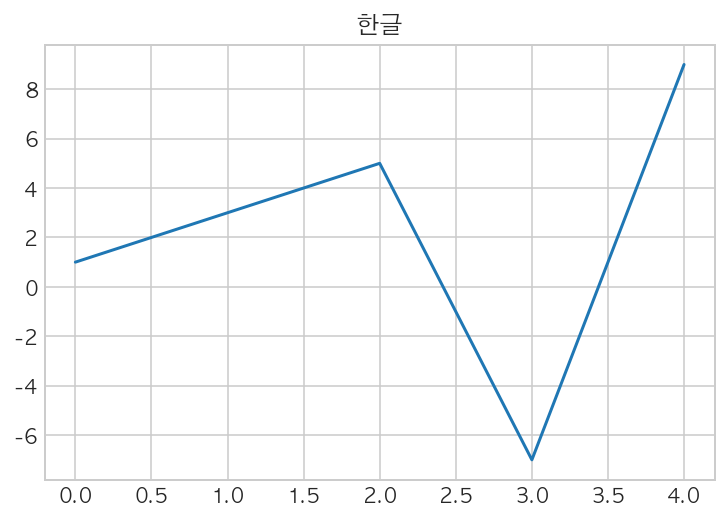

In [3]:
# 그래프 그려보기
pd.Series([1, 3, 5, -7, 9]).plot(title = "한글")

## 파일 불러오기
<img src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg">

In [4]:
%ls 0.data
#%ls 폴더이름

seoul-covid19-2021-01-03.csv
seoul-covid19-2021-05-11.csv
seoul-covid19-2021-09-11.csv
seoul-covid19-2021-11-22.csv
전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv
주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210930.csv


In [5]:
# seoul-covid19-2021-01-03.csv 불러오기
# df_01 변수에 담아 재사용합니다.
# df_01
df_01 = pd.read_csv("0.data/seoul-covid19-2021-01-03.csv")
df_01.shape

(20000, 7)

In [6]:
df_02 = pd.read_csv("0.data/seoul-covid19-2021-05-11.csv")
df_02.shape

(20000, 7)

In [7]:
df_03 = pd.read_csv("0.data/seoul-covid19-2021-09-11.csv")
df_03.shape

(46462, 7)

In [8]:
df_04 = pd.read_csv("0.data/seoul-covid19-2021-11-22.csv")
df_04.shape

(62913, 7)

## head, tail, sample 로 일부 데이터만 보기

In [9]:
df_01.head()

## 연번은 서울시 넘버 / 환자는 전체넘버

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,20000,64010,2021-01-03,종로구,-,타시도 확진자 접촉,퇴원
1,19999,64155,2021-01-03,강서구,-,감염경로 조사중,퇴원
2,19998,64083,2021-01-03,노원구,-,기타 확진자 접촉,퇴원
3,19997,64263,2021-01-02,마포구,-,기타 확진자 접촉,퇴원
4,19996,64264,2021-01-02,광진구,-,감염경로 조사중,퇴원


In [10]:
df_02.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
19995,39996,128410,2021-05-11,노원구,-,감염경로 조사중,퇴원
19996,39997,128478,2021-05-11,양천구,-,감염경로 조사중,퇴원
19997,39998,128724,2021-05-11,강남구,-,기타 확진자 접촉,퇴원
19998,39999,128347,2021-05-11,강북구,-,기타 확진자 접촉,퇴원
19999,40000,128576,2021-05-11,양천구,-,양천구 소재 직장 관련('21.5.),퇴원


In [11]:
df_03.sample()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
8491,77971,247803,2021-08-28,중랑구,-,기타 확진자 접촉,NaN


In [12]:
# csv 불러오기
# df_02 변수에 담아 재사용합니다.
# df_02

In [13]:
# 일부데이터만 가져와보기


## concat 으로 여러 개의 데이터프레임 합치기


* axis = 0

<img src="https://pandas.pydata.org/docs/_images/merging_concat_basic.png">

* axis = 1 
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1.png">

* 결측치를 제외하기 join="inner"
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_inner.png">


* [Merge, join, concatenate and compare documentation](https://pandas.pydata.org/docs/user_guide/merging.html#merge-join-concatenate-and-compare)

In [14]:
# pd.concat 으로 [df_01, df_02] 합치고 df 변수에 할당하기
# df
df_all = pd.concat([df_01, df_02, df_03, df_04])  # axis = 0 이 기본값 (행방향으로)
# 리스트형태로 넣어주면 하나의 형태로 합쳐준다. 즉, 개별 데이터를 합쳐줄수있다.
# 컬럼 이름이 다르면 결측치로 값을 넣어서 합쳐줌
df_all.shape

(149375, 7)

## 합친 데이터 확인하기

In [15]:
# head, tail, sample 을 통해 데이터 확인하기
df_all.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,20000,64010,2021-01-03,종로구,-,타시도 확진자 접촉,퇴원
1,19999,64155,2021-01-03,강서구,-,감염경로 조사중,퇴원
2,19998,64083,2021-01-03,노원구,-,기타 확진자 접촉,퇴원
3,19997,64263,2021-01-02,마포구,-,기타 확진자 접촉,퇴원
4,19996,64264,2021-01-02,광진구,-,감염경로 조사중,퇴원


In [16]:
df_all.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
62908,80005,252109,2021-08-31,서초구,-,기타 확진자 접촉,NaN
62909,80004,252107,2021-08-31,서초구,-,기타 확진자 접촉,퇴원
62910,80003,252106,2021-08-31,서초구,-,기타 확진자 접촉,퇴원
62911,80002,252861,2021-08-31,타시도,-,감염경로 조사중,퇴원
62912,80001,253226,2021-08-31,관악구,-,기타 확진자 접촉,퇴원


In [17]:
df_all.sample()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
18557,38558,124493,2021-05-04,마포구,-,기타 확진자 접촉,퇴원


## 중복 제거하기

In [18]:
df_all.shape

(149375, 7)

In [19]:
# df[df.duplicated("연번", keep = False)].sort_values("연번")

In [20]:
#df.drop_duplicates("연번") # 중복된 컬럼을 제외
df = df_all.drop_duplicates("연번", keep = "last").sort_values("연번", ascending = False) 
# keep = "last"  >> 퇴원현황의 경우에는 계속 변경되는 데이터이기 때문에 > 마지막 데이터를 활용하겠다 라는 의미.
df.shape

(142913, 7)

## 인덱스 값 설정하기
* 전체 데이터프레임의 행의 갯수와 "연번"의 유일값을 확인하면 중복값이 없는 것으로 확인할 수 있습니다.
* shape와 nunique()로 행의 수와 유일값이 일치하는지 확인합니다.

In [21]:
# shape
df.shape

(142913, 7)

In [22]:
# 연번의 nunique()
df["연번"].unique()

array([142913, 142912, 142911, ...,      3,      2,      1])

In [23]:
# set_index 를 통해 인덱스 값을 변경합니다.
df = df.set_index("연번")
df

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
142913,420784,2021-11-22,동대문구,-,감염경로 조사중,NaN
142912,420761,2021-11-22,양천구,-,감염경로 조사중,NaN
142911,420734,2021-11-22,송파구,-,기타 확진자 접촉,NaN
142910,420707,2021-11-22,양천구,-,기타 확진자 접촉,NaN
142909,420693,2021-11-22,영등포구,-,감염경로 조사중,NaN
...,...,...,...,...,...,...
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원
4,7,2020-01-30,마포구,중국,해외유입,퇴원
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원


## 연번 순으로 정렬하기

In [24]:
# sort_index 를 통해 인덱스값 기준으로 정렬합니다.
df = df.sort_index()
df

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원
2,5,2020-01-30,중랑구,중국,해외유입,퇴원
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원
4,7,2020-01-30,마포구,중국,해외유입,퇴원
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원
...,...,...,...,...,...,...
142909,420693,2021-11-22,영등포구,-,감염경로 조사중,NaN
142910,420707,2021-11-22,양천구,-,기타 확진자 접촉,NaN
142911,420734,2021-11-22,송파구,-,기타 확진자 접촉,NaN


In [25]:
# head 로 미리보기 합니다.
df.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원
2,5,2020-01-30,중랑구,중국,해외유입,퇴원
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원
4,7,2020-01-30,마포구,중국,해외유입,퇴원
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원


In [26]:
# tail로 미리보기 합니다.
df.tail()

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
142909,420693,2021-11-22,영등포구,-,감염경로 조사중,NaN
142910,420707,2021-11-22,양천구,-,기타 확진자 접촉,NaN
142911,420734,2021-11-22,송파구,-,기타 확진자 접촉,NaN
142912,420761,2021-11-22,양천구,-,감염경로 조사중,NaN
142913,420784,2021-11-22,동대문구,-,감염경로 조사중,NaN


## 판다스의 attributes
* [Series — pandas documentation](https://pandas.pydata.org/docs/reference/series.html#attributes)
* [DataFrame — pandas documentation](https://pandas.pydata.org/docs/reference/frame.html#attributes-and-underlying-data)


In [27]:
# shape
df.shape

(142913, 6)

In [28]:
# dtypes
df.dtypes

환자       int64
확진일     object
거주지     object
여행력     object
접촉력     object
퇴원현황    object
dtype: object

In [29]:
# columns
df.columns

Index(['환자', '확진일', '거주지', '여행력', '접촉력', '퇴원현황'], dtype='object')

In [30]:
# index
df.index

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            142904, 142905, 142906, 142907, 142908, 142909, 142910, 142911,
            142912, 142913],
           dtype='int64', name='연번', length=142913)

## 데이터 요약

In [31]:
# info를 통해 데이터를 요약합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142913 entries, 1 to 142913
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   환자      142913 non-null  int64 
 1   확진일     142913 non-null  object
 2   거주지     142913 non-null  object
 3   여행력     142913 non-null  object
 4   접촉력     142913 non-null  object
 5   퇴원현황    115750 non-null  object
dtypes: int64(1), object(5)
memory usage: 7.6+ MB


## 결측치 보기

In [32]:
# 결측치의 합계를 구합니다.
# isnull()
df.isnull().sum()

환자          0
확진일         0
거주지         0
여행력         0
접촉력         0
퇴원현황    27163
dtype: int64

In [33]:
# 평균(mean)을 통해 결측치의 비율을 구합니다.
df.isnull().mean() * 100

환자       0.000000
확진일      0.000000
거주지      0.000000
여행력      0.000000
접촉력      0.000000
퇴원현황    19.006668
dtype: float64

In [34]:
df["퇴원현황"].value_counts()

퇴원    114801
사망       949
Name: 퇴원현황, dtype: int64

## 기술통계

In [35]:
# describe()로 기술통계 값을 구합니다.
df.describe()

,환자
count,142913.000000
mean,221185.693681
std,122665.615932
min,2.000000
25%,114987.000000
50%,224530.000000
75%,330388.000000
max,420950.000000


In [36]:
# describe(include="object") 로 문자 데이터에 대한 기술통계 값을 구합니다.
df.describe(include = "object")

## 값이 동일할 경우 >> 동일한 값 중에 한가지로 선택되어 나타남
## ex. 송파구로 나타나는데 강남구도 같은 수치를 기록하여 > 강남구로 나타나는 경우도 발생함

,확진일,거주지,여행력,접촉력,퇴원현황
count,142913,142913,142913,142913,115750
unique,637,31,176,1286,2
top,2021-11-16,송파구,-,기타 확진자 접촉,퇴원
freq,1436,8791,140948,57235,114801


## 날짜 데이터 타입 변경하기

* 확진일 Series 형태로 가져오기
<img src="https://pandas.pydata.org/docs/_images/01_table_series.svg">

In [37]:
# 확진일 Series 형태로 가져오기
df["확진일"].head(1)

연번
1    2020-01-24
Name: 확진일, dtype: object

In [38]:
# pd.to_datetime 을 통한 데이터 타입 변경하기
df["확진일"] = pd.to_datetime(df["확진일"])
#다른 방법으로 데이터 타입을 변경할 수도 있는데 위 방법으로 진행하는 것을 추천

In [39]:
# df["확진일"]을 head() 로 일부만 가져와서 타입이  datetime64 형태로 변경되었는지 확인하기
df["확진일"].head(2)

연번
1   2020-01-24
2   2020-01-30
Name: 확진일, dtype: datetime64[ns]

## 파생변수 만들기
### 연, 월, 일, 요일 만들기

In [40]:
# 연도 파생변수 만들기
# df["연도"]
df["연도"] = df["확진일"].dt.year
df

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도
연번,,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원,2020
2,5,2020-01-30,중랑구,중국,해외유입,퇴원,2020
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,2020
4,7,2020-01-30,마포구,중국,해외유입,퇴원,2020
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,2020
...,...,...,...,...,...,...,...
142909,420693,2021-11-22,영등포구,-,감염경로 조사중,NaN,2021
142910,420707,2021-11-22,양천구,-,기타 확진자 접촉,NaN,2021
142911,420734,2021-11-22,송파구,-,기타 확진자 접촉,NaN,2021


In [41]:
# 월(month), 일(day), 요일(dayofweek) 만들기
# df["월"]
df["월"] = df["확진일"].dt.month
# df["일"]
df["일"] = df["확진일"].dt.day
# df["요일"]
df["요일"] = df["확진일"].dt.dayofweek  # 0 : 월요일 , 1: 화요일 형태로 되어있는 것을 한글로 변경 가능
df

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일
연번,,,,,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,24,4
2,5,2020-01-30,중랑구,중국,해외유입,퇴원,2020,1,30,3
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,2020,1,30,3
4,7,2020-01-30,마포구,중국,해외유입,퇴원,2020,1,30,3
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,2020,1,31,4
...,...,...,...,...,...,...,...,...,...,...
142909,420693,2021-11-22,영등포구,-,감염경로 조사중,NaN,2021,11,22,0
142910,420707,2021-11-22,양천구,-,기타 확진자 접촉,NaN,2021,11,22,0
142911,420734,2021-11-22,송파구,-,기타 확진자 접촉,NaN,2021,11,22,0


In [42]:
# 확진일, 연도, 월, 일, 요일 컬럼만 가져오기
# head 로 일부만 가져와 파생변수가 잘 생성되었는지 확인하기
df.head(1)

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일
연번,,,,,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,24,4


### 연도-월 만들기

In [43]:
# 연도-월 파생변수 만들기
# astype(str) 을 통해 수치 데이터를 문자 데이터로 변환하고 문자열 연결하기
# df["연도월"]
## df["연도"].astype(str) + df["월"].astype(str) # 그냥 합은 안되기 때문에 str형식으로 변경해서 결합시킴 > 추천하는 방법은 아님
df["확진일"].astype(str).str[:7] 

## 처음에 내가 틀린이유 df["확진일"].astype(str)[:7] >> 이렇게 식을 짜면, "확진일"에 해당하는 시리즈를 문자형태로 바꿔주되, 0~6만큼만 데이터를 가져오게됨
## 그렇기때문에 df["확진일"].astype(str).str[:7] >> .str[:7] 으로 해야함 >> 이렇게되면 문자형태로 바꿔준 데이터에서 문자열의 길이를 설정해서 데이터를 가져올 수 있음


연번
1         2020-01
2         2020-01
3         2020-01
4         2020-01
5         2020-01
           ...   
142909    2021-11
142910    2021-11
142911    2021-11
142912    2021-11
142913    2021-11
Name: 확진일, Length: 142913, dtype: object

In [44]:
# 문자열 슬라이싱으로도 만들 수 있습니다.
# df["연도월"]
df["연도월"] = df["확진일"].astype(str).str[:7]
df["연도월"]

연번
1         2020-01
2         2020-01
3         2020-01
4         2020-01
5         2020-01
           ...   
142909    2021-11
142910    2021-11
142911    2021-11
142912    2021-11
142913    2021-11
Name: 연도월, Length: 142913, dtype: object

In [45]:
# df["연도월"]이 잘 생성되었는지 확인하기
df.head(1)

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월
연번,,,,,,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,24,4,2020-01


### 요일 한글로 만들기
* 함수와 Series의 map 활용

In [46]:
dayofweek = "월화수목금토일"
dayofweek[1]

'화'

In [47]:
#find_dayofweek 함수로 요일 숫자를 넘겨주면 요일명을 반환하는 함수

def find_dayofweek(day_no):
    dayofweek = "월화수목금토일"
    return dayofweek[day_no]


In [48]:
# 함수가 잘 만들어졌는지 확인하기
find_dayofweek(0)

'월'

In [49]:
# map을 사용해서 요일 컬럼을 요일명으로 변환하고 "요일명"이라는 새로운 컬럼에 저장하기
df["요일명"] = df["요일"].map(find_dayofweek)


In [50]:
# ["요일", "요일명"]을 sample(5) 로 임의의 5개만 불러와 잘 변환이 되었는지 확인하기
df[["요일", "요일명"]].sample(5)

,요일,요일명
연번,,
399,5,토
52834,2,수
56347,2,수
71349,5,토
114330,4,금


## 전체 수치 변수 히스토그램 그리기

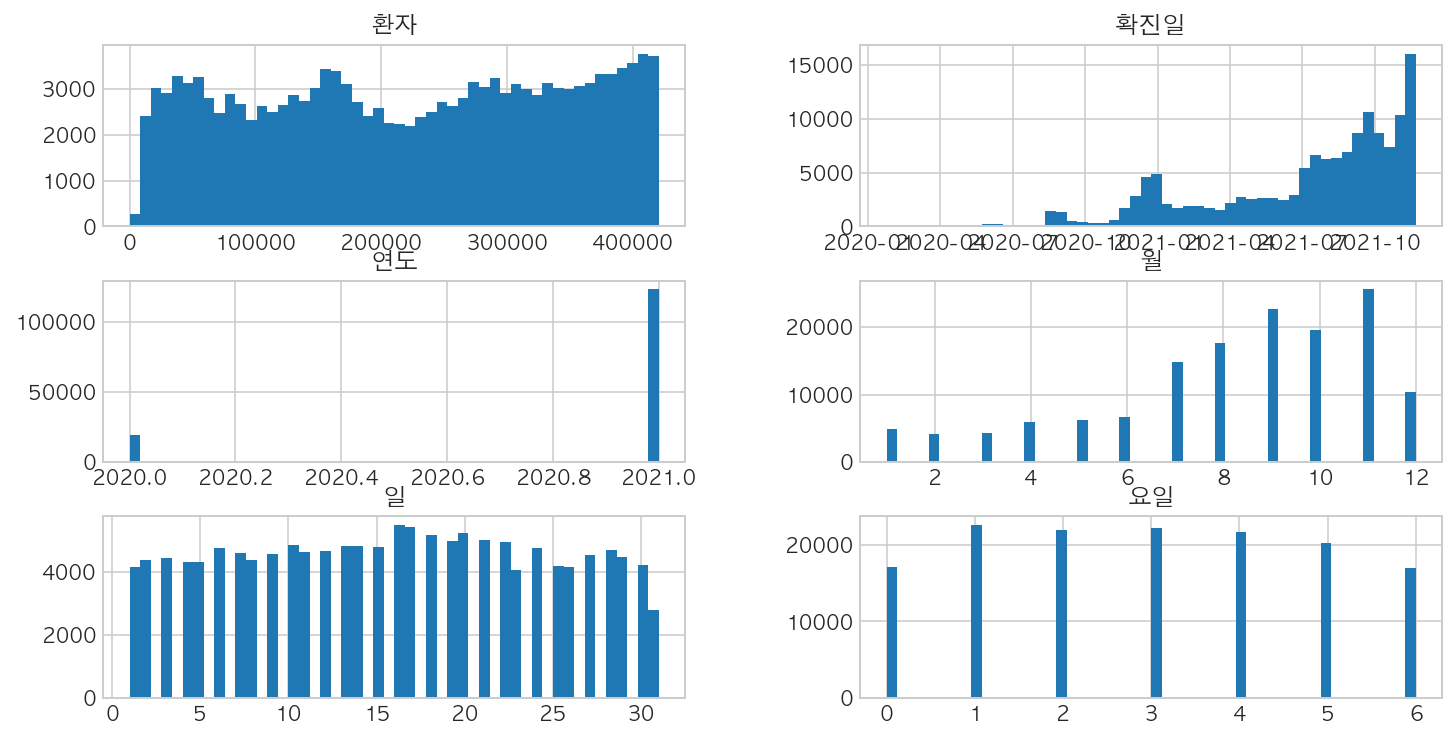

In [51]:
# df.hist로 히스토그램 그리기
_ = df.hist(figsize = (12,6), bins = 50)

## value_counts로 하나의 변수에 대한 빈도수 구하기
### 연도

In [52]:
# "연도" 컬럼을 통해 빈도수 구하기
df["연도"].value_counts()

2021    123521
2020     19392
Name: 연도, dtype: int64

In [53]:
# "연도" 컬럼의 비율 구하기
df["연도"].value_counts(normalize= True) * 100 # 비율을 백분위로 나타내기 위해 100을 곱하자

2021    86.430906
2020    13.569094
Name: 연도, dtype: float64

### 연도월

In [54]:
df

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명
연번,,,,,,,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,24,4,2020-01,금
2,5,2020-01-30,중랑구,중국,해외유입,퇴원,2020,1,30,3,2020-01,목
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,2020,1,30,3,2020-01,목
4,7,2020-01-30,마포구,중국,해외유입,퇴원,2020,1,30,3,2020-01,목
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,2020,1,31,4,2020-01,금
...,...,...,...,...,...,...,...,...,...,...,...,...
142909,420693,2021-11-22,영등포구,-,감염경로 조사중,NaN,2021,11,22,0,2021-11,월
142910,420707,2021-11-22,양천구,-,기타 확진자 접촉,NaN,2021,11,22,0,2021-11,월
142911,420734,2021-11-22,송파구,-,기타 확진자 접촉,NaN,2021,11,22,0,2021-11,월


In [55]:
# 연도월에 대한 빈도수 구하기
# 빈도수를 구하고 sort_index 로 정렬합니다.
# year_month

year_month = df["연도월"].value_counts().sort_index()


<AxesSubplot:>

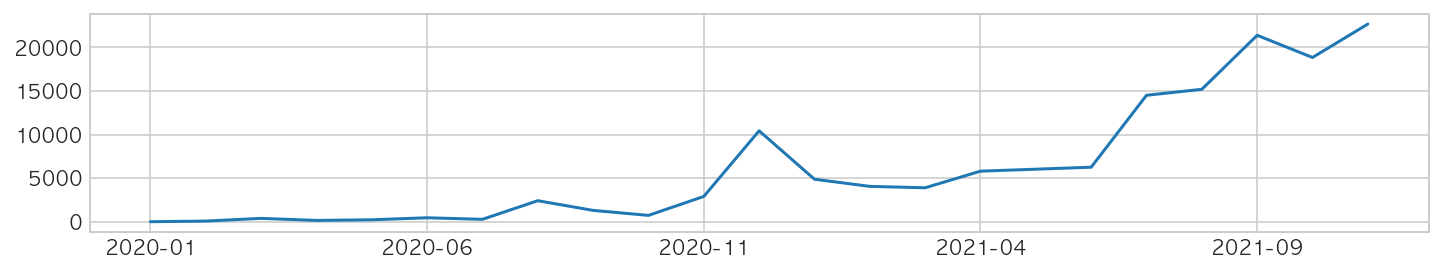

In [56]:
# 연도월을 시각화 합니다.
year_month.plot(figsize = (12,2))

<AxesSubplot:>

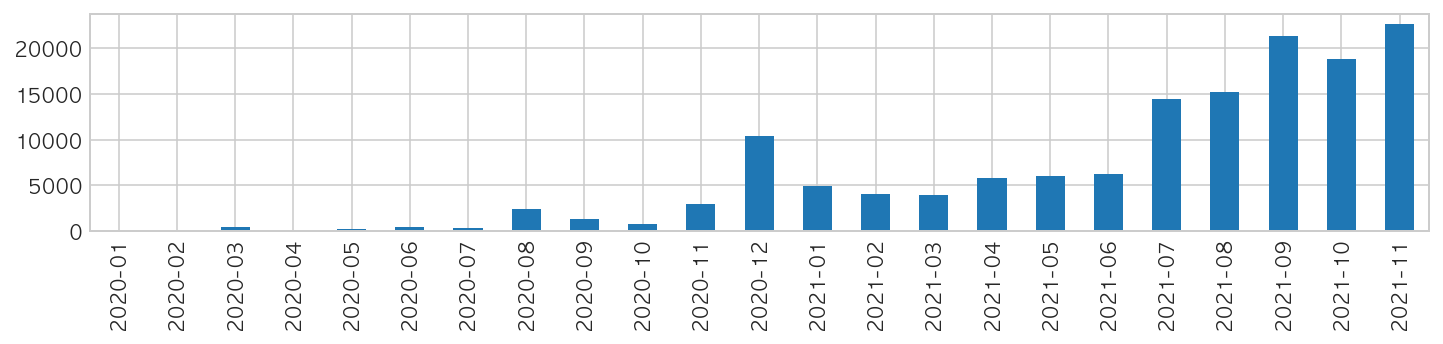

In [57]:
# 연도월을 막대 그래프로 시각화 합니다.
year_month.plot.bar(figsize = (12,2))

### 요일별 빈도수 구하기

In [58]:
# 빈도수 구하고 인덱스 번호로 정렬합니다.
# weekday_count 변수에 담아 재사용합니다.
# weekday_count
weekday_count = df["요일"].value_counts().sort_index()

In [59]:
# 리스트컴프리헨션 사용해서 리스트 만들기 ****
# "월화수목금토일" 리스트로 만들어 weekday_list 변수로 재사용하기
# weekday_list
weekday_list = [w for w in "월화수목금토일"]  ## 자주 쓰는 문법** 리스트컴프리헨션
weekday_list


# weekday_list = []
# for i in "월화수목금토일":
#     weekday_list.append(i)
# weekday_list

['월', '화', '수', '목', '금', '토', '일']

<AxesSubplot:>

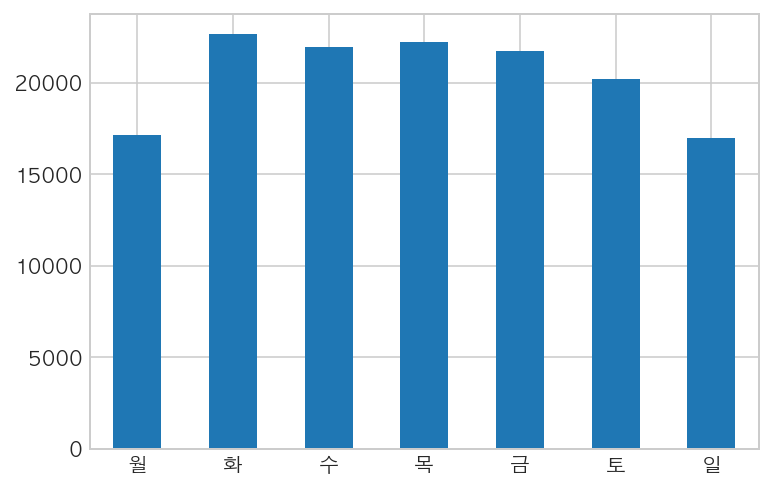

In [60]:
# 인덱스 값을 요일명으로 변경하고 시각화 합니다.
weekday_count.index = weekday_list
weekday_count.plot.bar(rot=0)

### 확진일 빈도수 구하기

In [61]:
# df["확진일"] 빈도수 구하고 인덱스 값인 날짜로 정렬하기
day_count = df["확진일"].value_counts()
day_count

2021-11-16    1436
2021-11-17    1429
2021-11-18    1401
2021-11-19    1373
2021-11-20    1320
              ... 
2020-04-30       1
2020-01-24       1
2020-04-15       1
2020-04-24       1
2020-03-05       1
Name: 확진일, Length: 637, dtype: int64

<AxesSubplot:>

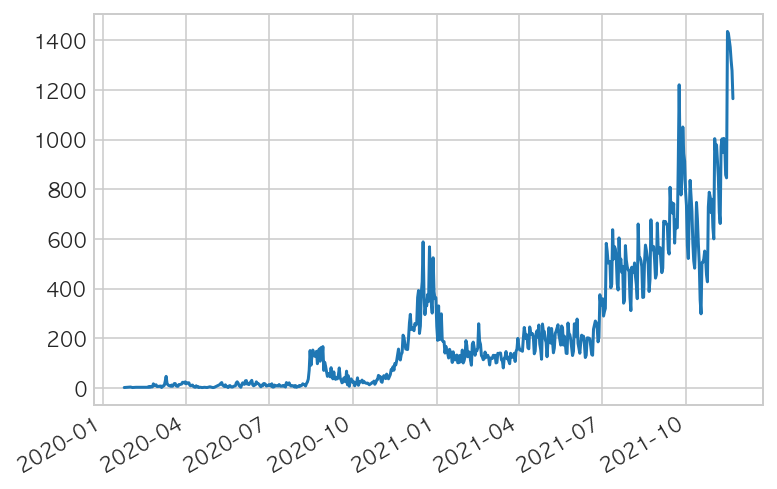

In [62]:
# 선 그래프로 시각화 하기
day_count.plot()

## 전체 확진일 데이터 만들기
### tail로 초기 데이터 보기

In [63]:
# head(10)로 10번째 확진 데이터를 봅니다.
day_count = day_count.sort_index()
day_count.head(10)

2020-01-24    1
2020-01-30    3
2020-01-31    3
2020-02-02    1
2020-02-05    2
2020-02-06    2
2020-02-16    2
2020-02-19    2
2020-02-20    5
2020-02-21    2
Name: 확진일, dtype: int64

### iloc를 통해 첫 확진일과 마지막 확진일자 찾기

In [64]:
last_day = df.iloc[0]["확진일"]
last_day

Timestamp('2020-01-24 00:00:00')

In [65]:
first_day = df.iloc[-1]["확진일"]
first_day

Timestamp('2021-11-22 00:00:00')

### date_range로 전체 기간 데이터 만들기

In [66]:
# pd.date_range 로 전체 기간을 생성합니다.
all_day = pd.date_range(start = first_day, end = last_day)
all_day

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [67]:
# all_day 를 데이터프레임으로 변환합니다.
df_all_day = all_day.to_frame()
df_all_day

,0


In [68]:
# "확진수" 라는 컬럼을 생성해서 위에서 구한 day_count 를 추가합니다.
# 확진자가 없는 날도 인덱스에 생성이 됩니다.
df_all_day["확진수"] = day_count
df_all_day.head(10)

,0,확진수
2020-01-24,NaT,1
2020-01-30,NaT,3
2020-01-31,NaT,3
2020-02-02,NaT,1
2020-02-05,NaT,2
2020-02-06,NaT,2
2020-02-16,NaT,2
2020-02-19,NaT,2
2020-02-20,NaT,5
2020-02-21,NaT,2


In [69]:
# 필요 없는 0 컬럼을 삭제합니다.
del df_all_day[0]

#지웠는데 한번더 del 돌리면 에러가 난다.

### 결측치 채우기

In [70]:
# 비어있는 값은 확진자가 없었던 날이기 때문에 fillna로 0으로 채웁니다.
df_all_day = df_all_day.fillna(0)
df_all_day.head()

,확진수
2020-01-24,1
2020-01-30,3
2020-01-31,3
2020-02-02,1
2020-02-05,2


<AxesSubplot:>

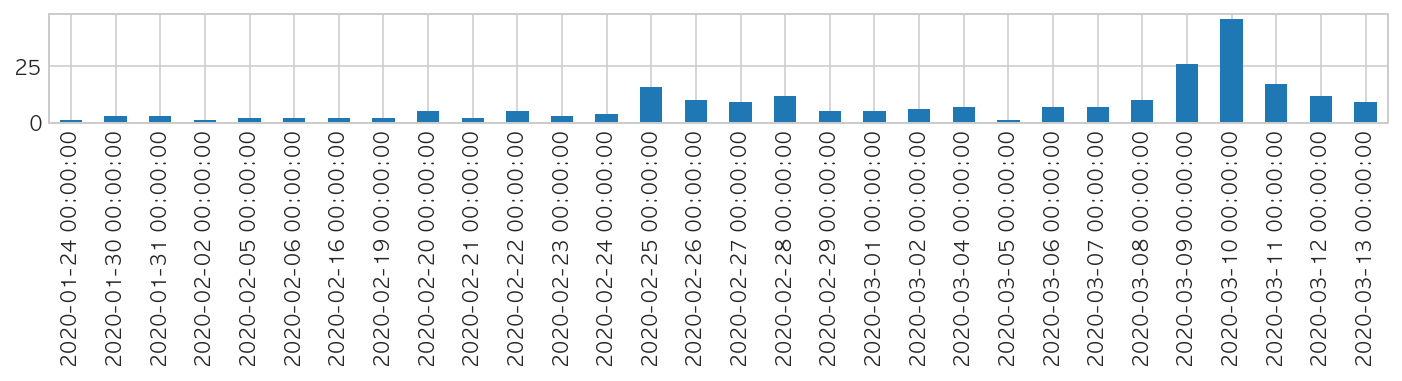

In [71]:
day_count.head(30).plot.bar(figsize = (12,1))

<AxesSubplot:>

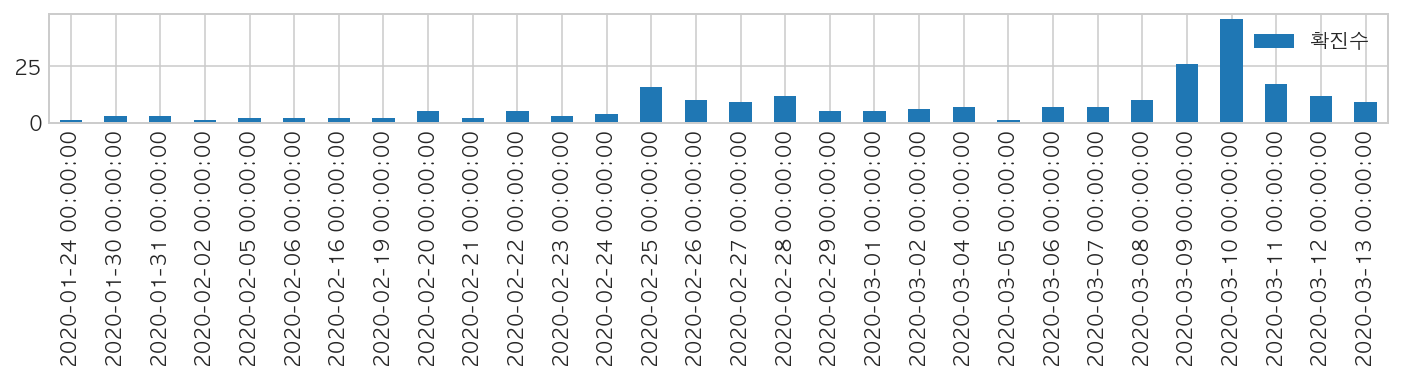

In [72]:
# day_count 에서 초기 30개의 데이터에 대해서 슬라이싱 해서 시각화 합니다.
df_all_day.head(30).plot.bar(figsize = (12,1))

### 누적 확진 수 구하기

In [73]:
# df

In [74]:
# cumsum 으로 "누적확진수" 구해서 새로운 변수에 담기
df_all_day["누적확진수"] = df_all_day["확진수"].cumsum()

<AxesSubplot:>

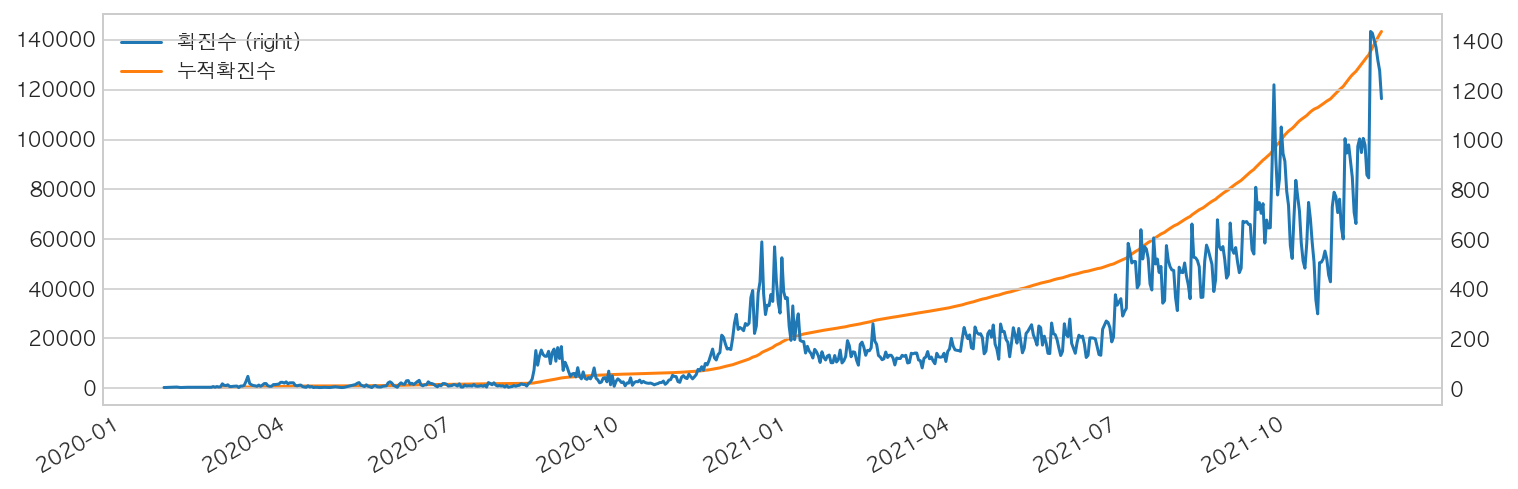

In [75]:
# 시각화 하기
#df_all_day.plot() >> 스케일 값이 차이가 나서 보기 어려움

df_all_day.plot(secondary_y = "확진수", figsize = (12,4)) # secondary_y
# 이측? 이축? 그래프는 시각화 시 추천하는 형태는 아님

#변수에 할당하거나 plt.show() 를 활용해서 깔끔하게 표현할 수 있다.
#df_all_day.plot(subplots = True, figsize= (12,4))
#plt.show()

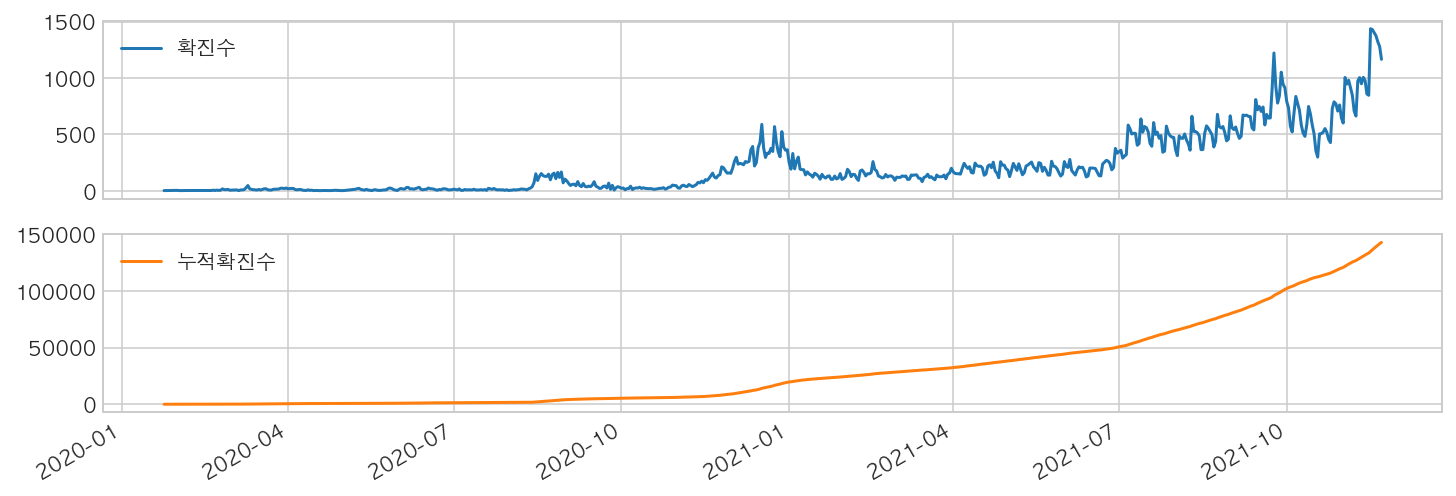

In [76]:
df_all_day.plot(subplots = True, figsize= (12,4))
plt.show()

## 거주지

In [77]:
# 거주지 빈도수 구하기
df["거주지"].value_counts()

## 데이터가 같은 컬럼 혹은 값이라도 띄어쓰기 등등 이슈로 전처리가 필요한 경우 발생

송파구     8791
강남구     8791
관악구     7487
구로구     7143
타시도     7137
영등포구    6884
강서구     6377
은평구     6021
성북구     5906
강동구     5899
노원구     5860
동대문구    5630
동작구     5577
서초구     5522
중랑구     5174
마포구     4953
양천구     4708
광진구     4628
강북구     4019
도봉구     3945
성동구     3898
서대문구    3722
용산구     3534
금천구     3531
기타      2741
종로구     2555
중구      2473
강서구        4
성북구        1
용산구        1
 노원구       1
Name: 거주지, dtype: int64

### 타시도, 기타 전처리

In [78]:
# "거주지" => "거주구"로 사본 생성
df["거주구"] = df["거주지"]
df.head(1)

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구
연번,,,,,,,,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,24,4,2020-01,금,강서구


In [79]:
# 텍스트 앞뒤 공백 제거하기
df["거주구"] = df["거주구"].str.strip()

In [80]:
# 타시도 => 기타로 변경하기
df["거주구"] = df["거주구"].str.replace("타시도", "기타")

#여기서 replace는 python에서의 스트링 문법과는 다르다.

In [81]:
# "거주구" 빈도수 구하기
gu_count = df["거주구"].value_counts()

<AxesSubplot:>

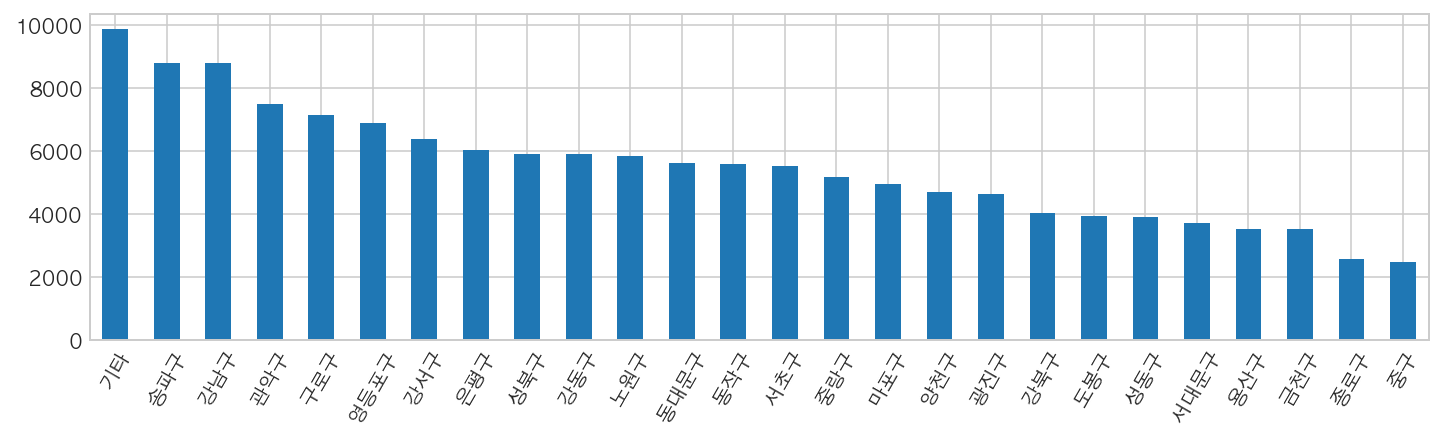

In [82]:
# gu_count 변수에 담긴 값 시각화 하기
gu_count.plot.bar(figsize =(12,3), rot=60)

## 두 개의 변수에 대한 빈도수 구하기
### 연도, 퇴원현황 두 개의 변수에 대한 빈도수 구하기

In [83]:
# pd.crosstab 으로 연도, 퇴원현황 두 개의 변수에 대한 빈도수 구하기
# 연도, 퇴원현황 빈도수 구하기

df_yh = pd.crosstab(df["연도"], df["퇴원현황"])

In [84]:
# pd.crosstab 으로 연도, 퇴원현황 두 개의 변수에 대한 빈도 빈율 구하기
pd.crosstab(df["연도"], df["퇴원현황"], normalize= True)

퇴원현황,사망,퇴원
연도,,
2020,0.002644,0.164648
2021,0.005555,0.827153


In [85]:
pd.crosstab(df["연도"], df["퇴원현황"], normalize= True) * 100

퇴원현황,사망,퇴원
연도,,
2020,0.264363,16.464795
2021,0.555508,82.715335


In [86]:
df_yh["비율"] = df_yh["사망"] / df_yh["퇴원"] * 100
df_yh

퇴원현황,사망,퇴원,비율
연도,,,
2020,306,19058,1.605625
2021,643,95743,0.671590


### 연도, 월 두 개의 변수에 대한 빈도수 구하기

In [87]:
# pd.crosstab 으로 연도, 월 두 개의 변수에 대한 빈도수 구하기
pd.crosstab(df["연도"], df["월"])

월,1,2,3,4,5,6,7,8,9,10,11,12
연도,,,,,,,,,,,,
2020,7,80,391,156,229,459,281,2415,1306,733,2904,10431
2021,4879,4060,3898,5804,6028,6258,14504,15193,21383,18840,22674,0


<AxesSubplot:xlabel='연도'>

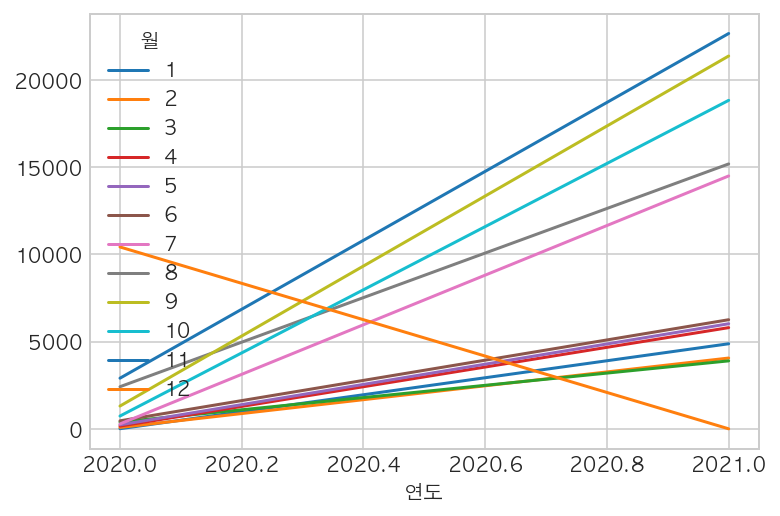

In [88]:
# 시각화 하기
ym = pd.crosstab(df["연도"], df["월"])
ym.plot()

<AxesSubplot:xlabel='연도'>

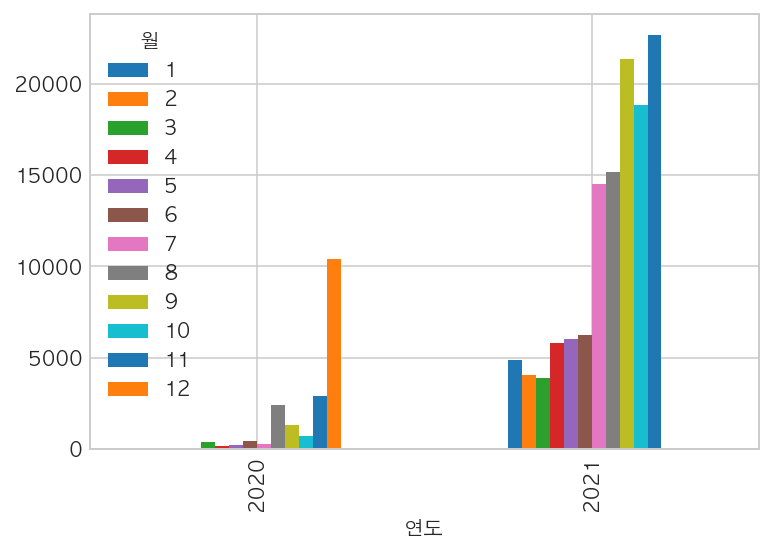

In [89]:
ym.plot.bar()

<AxesSubplot:xlabel='월'>

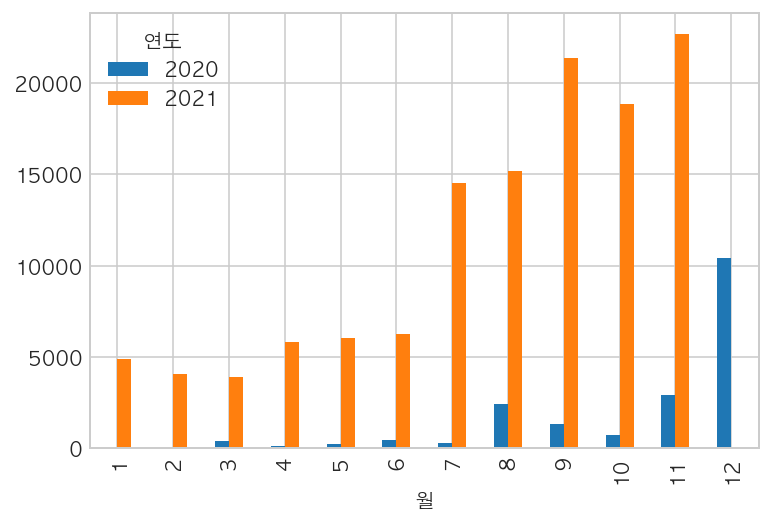

In [90]:
ym.T.plot.bar()  # T 변수를 바꿔서  , rot 는 축을 바꿔서(글자 똑바로) 시각화할수 있다.

<AxesSubplot:xlabel='월'>

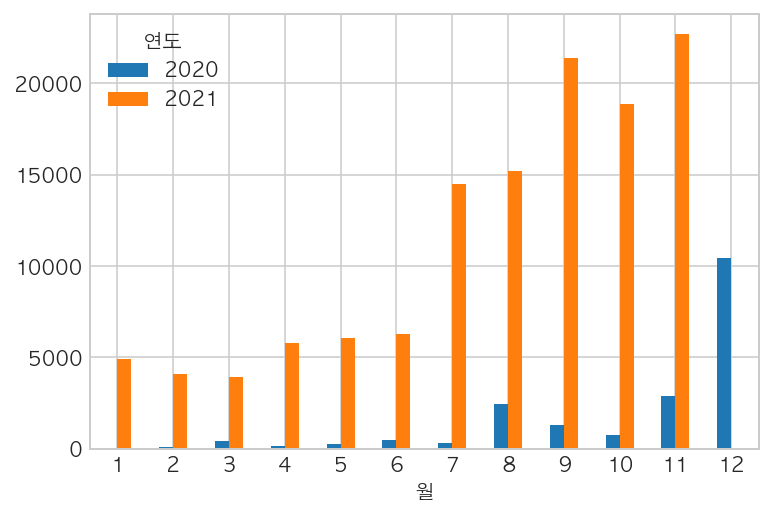

In [91]:
ym.T.plot.bar(rot = 0) #  rot 는 축을 바꿔서(글자 똑바로) 시각화

### 연도, 요일 두 개의 변수에 대한 빈도수 구하기

In [92]:
# pd.crosstab 으로 연도, 요일 두 개의 변수에 대한 빈도수 구하기
yw = pd.crosstab(df["연도"], df["요일"])
yw

요일,0,1,2,3,4,5,6
연도,,,,,,,
2020,2626,2895,2890,3462,2700,2676,2143
2021,14523,19748,19073,18756,19037,17548,14836


In [93]:
# 리스트컴프리헨션 사용해서 리스트 만들기
# weekday_list
weekday_list = [w for w in "월화수목금토일"]
weekday_list

['월', '화', '수', '목', '금', '토', '일']

In [94]:
# 컬럼명 변경하기
yw.colums = weekday_list
yw

<ipython-input-94-4a1290b8bb51>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  yw.colums = weekday_list


요일,0,1,2,3,4,5,6
연도,,,,,,,
2020,2626,2895,2890,3462,2700,2676,2143
2021,14523,19748,19073,18756,19037,17548,14836


<AxesSubplot:xlabel='연도'>

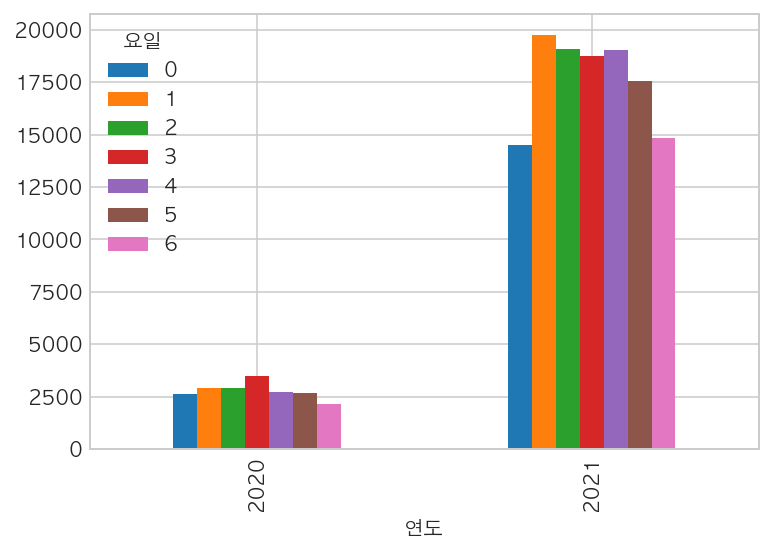

In [95]:
yw.plot.bar()

<AxesSubplot:xlabel='요일'>

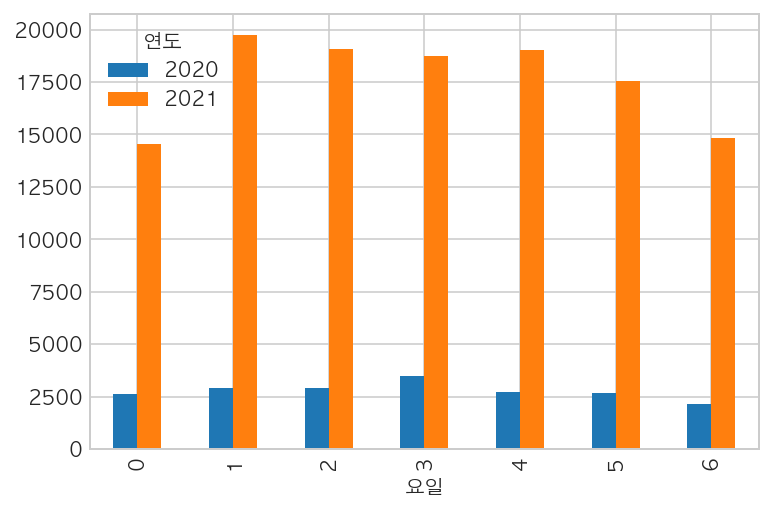

In [96]:
#요일별로 보고싶다면
yw.T.plot.bar()

<AxesSubplot:xlabel='요일'>

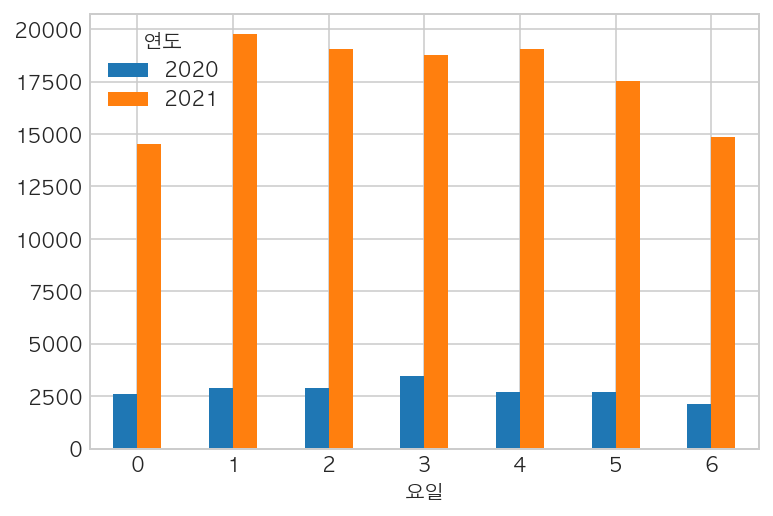

In [97]:
yw.T.plot.bar(rot = 0) # 글자 똑바로 rot 

In [98]:
# seaborn 의 장점은 연산기능이 제공되며 시각화가 된다.
# pandas 는 연산기능을 제공하지 않는다,,

### 거주구, 연도월에 대한 빈도수 구하기

In [99]:
# pd.crosstab 으로 두 개 변수에 대한 빈도수 구하기
# 거주구, 연도월에 대한 빈도수 구하기
gu_ym = pd.crosstab(df["거주구"], df["연도월"])
gu_ym.head(1)

연도월,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,...,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11
거주구,,,,,,,,,,,,,,,,,,,,,
강남구,0,7,34,23,11,8,15,88,84,87,...,118,240,428,529,792,1249,1287,1224,905,858


In [100]:
# background_gradient() 로 빈도수 표현하기
gu_ym.style.background_gradient() # 월별로 데이터를 볼때 좋음

연도월,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11
거주구,,,,,,,,,,,,,,,,,,,,,,,
강남구,0,7,34,23,11,8,15,88,84,87,156,422,226,118,240,428,529,792,1249,1287,1224,905,858
강동구,0,4,6,3,11,11,14,94,42,19,74,303,180,161,252,253,314,284,523,456,884,940,1071
강북구,0,0,5,0,9,10,4,85,31,15,41,245,174,124,125,133,266,164,348,333,568,649,690
강서구,1,1,20,4,19,33,25,117,65,22,305,729,213,96,133,217,189,213,576,652,895,711,1145
관악구,0,4,30,9,16,58,27,106,135,86,74,473,163,182,129,313,226,268,1132,1001,1064,802,1189
광진구,0,1,5,2,6,3,5,74,34,11,43,279,119,155,253,239,214,236,468,531,891,485,574
구로구,0,1,33,1,6,45,5,60,32,22,72,348,179,237,126,142,183,160,568,629,1424,1566,1304
금천구,0,1,11,0,3,17,7,34,20,5,27,201,72,69,26,84,146,103,334,375,595,656,745
기타,0,10,22,13,12,25,12,175,128,82,204,1620,612,415,243,319,248,341,681,805,1206,1273,1432


In [101]:
gu_ym.T.style.background_gradient() # 행과 열을 바꿔서 보면, 

거주구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
연도월,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,1
2020-02,7,4,0,1,4,1,1,1,10,8,0,1,1,0,4,4,3,1,12,1,1,0,7,8,0,0
2020-03,34,6,5,20,30,5,33,11,22,12,6,25,23,16,9,21,3,13,15,17,18,12,14,4,5,12
2020-04,23,3,0,4,9,2,1,0,13,3,3,5,7,7,6,13,13,9,10,3,4,6,7,1,1,3
2020-05,11,11,9,19,16,6,6,3,12,8,10,3,9,3,8,4,21,5,11,7,11,20,7,3,3,3
2020-06,8,11,10,33,58,3,45,17,25,13,43,4,13,12,8,15,9,4,7,42,29,12,18,3,3,14
2020-07,15,14,4,25,27,5,5,7,12,6,2,6,17,14,6,7,8,9,44,1,7,4,11,6,8,11
2020-08,88,94,85,117,106,74,60,34,175,192,73,74,110,79,52,79,33,244,161,78,67,48,122,37,30,103
2020-09,84,42,31,65,135,34,32,20,128,60,69,34,57,30,34,52,30,48,79,31,53,21,65,23,8,41


<AxesSubplot:xlabel='거주구', ylabel='연도월'>

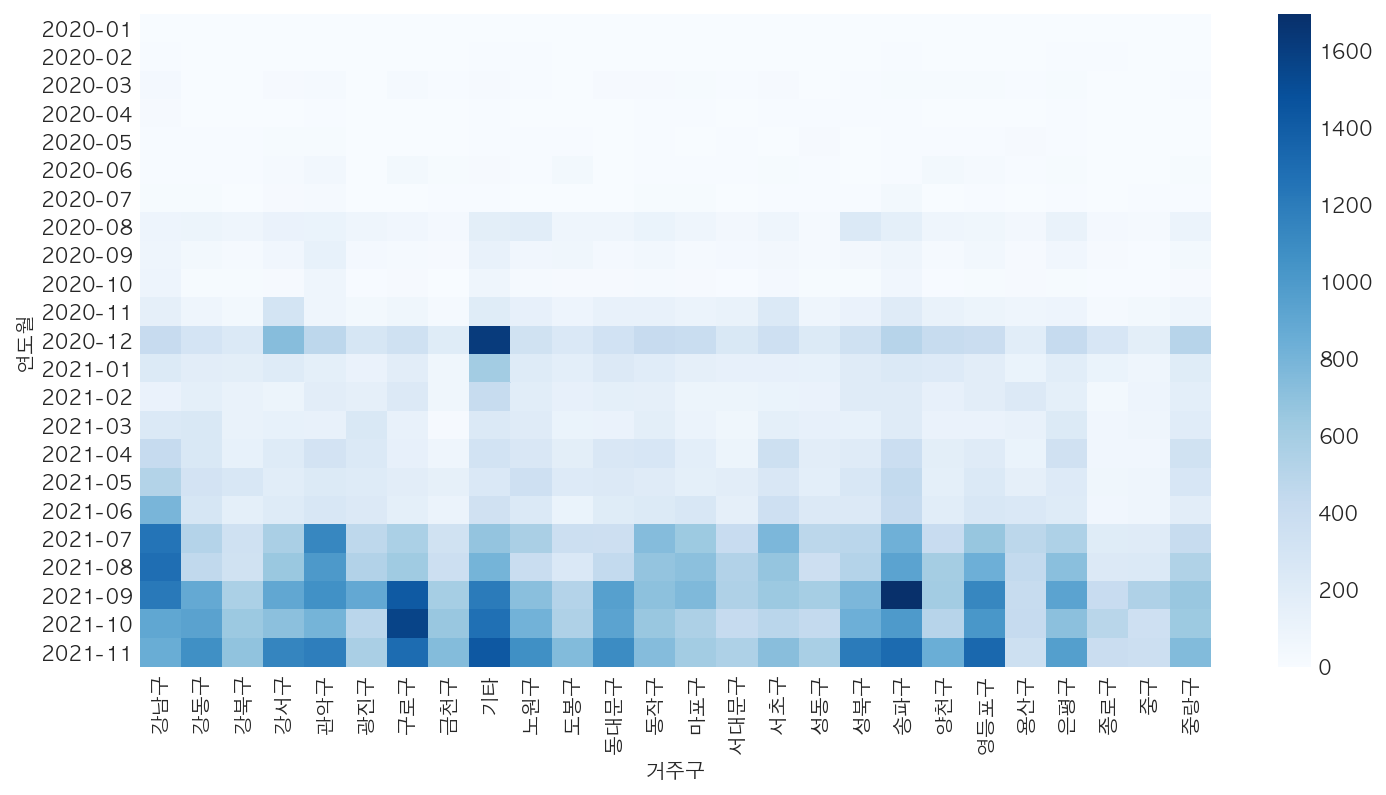

In [102]:
import seaborn as sns
plt.figure(figsize = (12,6))  
sns.heatmap(gu_ym.T, cmap = "Blues")

# 판다스로 시각화 했을때는 해당 열에서 어떤게 빈도수가 많은지 표현을 하고
# 시본의 히트맵으로 보면 전체 데이터에서 어떤 부분이 빈도수가 많은지 표현을 함

In [103]:
# gu_month.T 로 행과 열을 바꾼 뒤에 보기
# background_gradient()


## Boolean Indexing 으로 특정 조건 값 찾기
### 여러 조건 비교하기

In [104]:
# 강남구에서 "일요일"에 확진된 데이터만 찾기
# .loc[행]
# .loc[행, 열]
# .loc[조건, 열]

# gu_ym.loc["강남구"]
# gu_ym.loc[["강남구","송파구"]]
gu_ym.loc[["강남구","송파구","서초구"], ["2020-01", "2020-07", "2020-08"]]

연도월,2020-01,2020-07,2020-08
거주구,,,
강남구,0,15,88
송파구,0,44,161
서초구,0,7,79


In [105]:
gu_ym.loc["강남구", "2021-11"]

858

In [106]:
gu_ym.loc["강남구", ["2021-10","2021-11"]]

연도월
2021-10    905
2021-11    858
Name: 강남구, dtype: int64

In [107]:
# 거주구가 강남구이며, 여행력이 일본인 데이터 찾기

df.loc[(df["거주구"] == "강남구") & (df["여행력"] == "일본")]

#변수에 담아서 사용하는 방법도 있음
#강남 = (df["거주구"] == "강남구")
#일본 = (df["여행력"] == "일본")
# df[ 강남 & 일본 ]

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구
연번,,,,,,,,,,,,,
12540,44037,2020-12-14,강남구,일본,해외유입,퇴원,2020,12,14,0,2020-12,월,강남구
31136,99978,2021-03-24,강남구,일본,감염경로 조사중,퇴원,2021,3,24,2,2021-03,수,강남구
47099,149511,2021-06-16,강남구,일본,해외유입,퇴원,2021,6,16,2,2021-06,수,강남구
71073,223580,2021-08-14,강남구,일본,해외유입,퇴원,2021,8,14,5,2021-08,토,강남구


### str.contains 활용하기

In [108]:
# 접촉력의 영문자 검색을 위해 영문자를 모두 대문자로 만들고 "접촉력_대문자"컬럼을 생성하기
df["접촉력_대문자"] = df["접촉력"].str.upper()
df.head(1)

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구,접촉력_대문자
연번,,,,,,,,,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,24,4,2020-01,금,강서구,해외유입


In [109]:
# "접촉력_대문자" 컬럼으로 PC방 데이터를 찾고 접촉력 컬럼에 대해서만 빈도수 구하기
#df.loc[ df["접촉력_대문자"].str.contains("PC방") , "접촉력"]
# .loc[조건, 열]
df.loc[ df["접촉력_대문자"].str.contains("PC방") , "접촉력"].value_counts()

용산구 소재 PC방 관련    82
강북구 소재 PC방 관련    35
강남구 소재 PC방 관련    32
강북구 소재 pc방 관련    23
동대문관련(교회pc방)     20
성동구 소재 PC방 관련    10
금천구 소재 PC방 관련     9
Name: 접촉력, dtype: int64

### isin 으로 여러 값 찾기

In [110]:
# isin 을 사용해 리스트로 여러 값을 찾아오기
# "거주구"가 "강남구", "서초구", "송파구" 인 데이터만 찾기
# loc를 통해 해당 조건의 "접촉력" 컬럼만 가져오기

df [ df["거주구"].isin(["강남구", "서초구", "송파구"]) ]

# str.contains 특정 텍스트를 포함한 것을 찾고 싶을때 활용
# isin 특정 텍스트가 완전히 일치하는 것만 찾고 싶을때 활용

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구,접촉력_대문자
연번,,,,,,,,,,,,,,
9,19,2020-02-05,송파구,싱가폴,해외유입,퇴원,2020,2,5,2,2020-02,수,송파구,해외유입
23,188,2020-02-21,서초구,-,타시도 확진자 접촉,퇴원,2020,2,21,4,2020-02,금,서초구,타시도 확진자 접촉
26,420,2020-02-22,서초구,-,타시도 확진자 접촉,퇴원,2020,2,22,5,2020-02,토,서초구,타시도 확진자 접촉
30,780,2020-02-22,송파구,-,타시도 확진자 접촉,퇴원,2020,2,22,5,2020-02,토,송파구,타시도 확진자 접촉
31,787,2020-02-22,서초구,-,타시도 확진자 접촉,퇴원,2020,2,22,5,2020-02,토,서초구,타시도 확진자 접촉
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142777,420586,2021-11-22,송파구,-,감염경로 조사중,NaN,2021,11,22,0,2021-11,월,송파구,감염경로 조사중
142785,420754,2021-11-22,송파구,-,감염경로 조사중,NaN,2021,11,22,0,2021-11,월,송파구,감염경로 조사중
142843,418328,2021-11-22,송파구,-,기타 확진자 접촉,NaN,2021,11,22,0,2021-11,월,송파구,기타 확진자 접촉


## 여행력

In [111]:
#  접촉력이 해외유입인 데이터에 대해 "해외유입" 변수 만들기
df["해외유입"] = (df["접촉력"] == "해외유입")


In [112]:
# 거주구, 해외유입 빈도수 구하기
gu_oversea = pd.crosstab(df["거주구"], df["해외유입"])
gu_oversea

해외유입,False,True
거주구,,
강남구,8619,172
강동구,5837,62
강북구,3998,21
강서구,6286,95
관악구,7432,55
광진구,4585,43
구로구,7109,34
금천구,3514,17
기타,9616,262


In [113]:
# 거주구 해외유입 비율 구하기
gu_oversea["비율"] = gu_oversea[True] / gu_oversea[False] * 100
gu_oversea

해외유입,False,True,비율
거주구,,,
강남구,8619,172,1.995591
강동구,5837,62,1.062189
강북구,3998,21,0.525263
강서구,6286,95,1.511295
관악구,7432,55,0.740043
광진구,4585,43,0.937841
구로구,7109,34,0.478267
금천구,3514,17,0.483779
기타,9616,262,2.724626


<AxesSubplot:xlabel='거주구'>

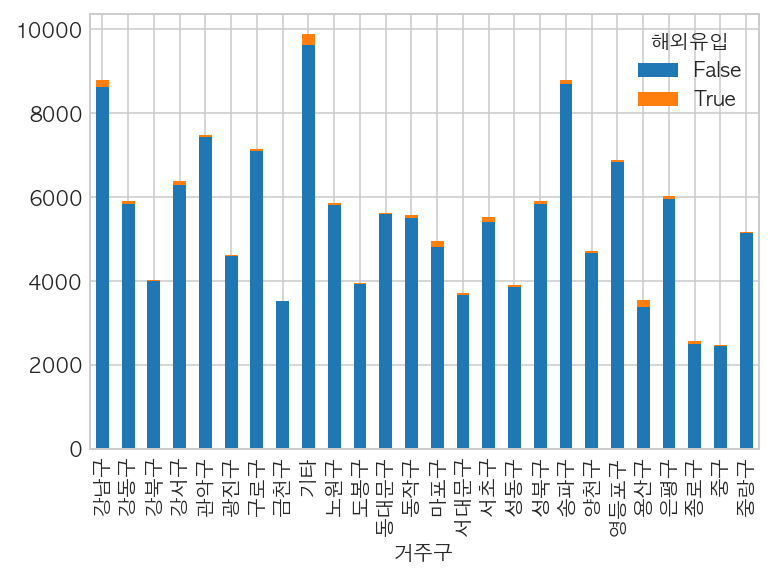

In [114]:
# 해외유입 여부에 따라 막대그래프를 그립니다.
# stacked=True 로 두 가지를 함께 그립니다.
gu_oversea.iloc[:, :2].plot.bar(stacked = True)
#stacked = True : 위로 쌓아서 그리게된다.

<AxesSubplot:xlabel='거주구'>

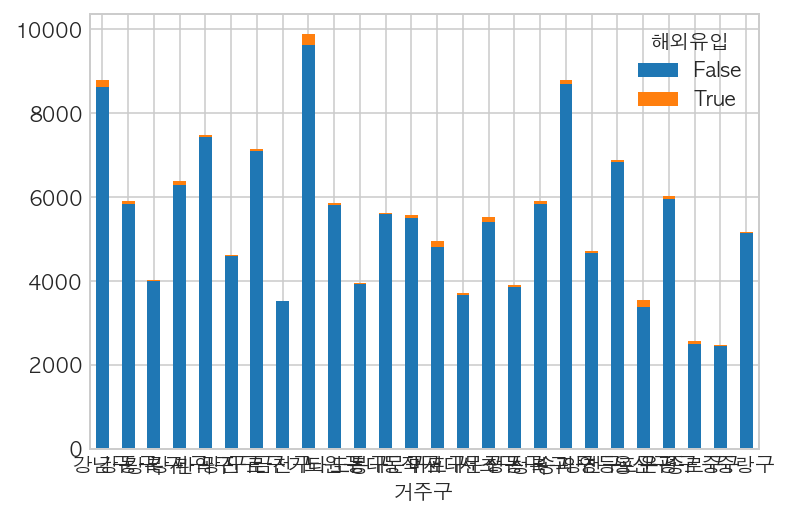

In [115]:
gu_oversea.iloc[:, :2].plot.bar(rot = 0, stacked = True)

## pivot_table 사용하기

In [116]:
# 거주구별 해외유입 여부에 따른 빈도수 구하기
# gu_over_count

pd.pivot_table(data = df , index = "거주구", columns = "해외유입", aggfunc = "count", values = "환자")

해외유입,False,True
거주구,,
강남구,8619,172
강동구,5837,62
강북구,3998,21
강서구,6286,95
관악구,7432,55
광진구,4585,43
구로구,7109,34
금천구,3514,17
기타,9616,262


In [117]:
weekday_list

['월', '화', '수', '목', '금', '토', '일']

In [118]:
# 거주구에 따른 요일별 확진자 빈도수
# df_gu_weekday[weekday_list].style.bar()
gu_week = pd.pivot_table(data=df, index = "거주구", columns = "요일명", aggfunc = 'count', values = "환자")
gu_week[weekday_list] # 만들어둔 weekday_list를 활용하여 정렬

gu_week[weekday_list].style.bar()

요일명,월,화,수,목,금,토,일
거주구,,,,,,,
강남구,1136,1431,1374,1283,1379,1179,1009
강동구,671,936,936,896,875,858,727
강북구,572,608,608,634,596,527,474
강서구,797,967,947,1012,1043,891,724
관악구,784,1271,1212,1103,1159,1093,865
광진구,589,737,704,723,665,638,572
구로구,873,1137,1080,1113,1102,1017,821
금천구,388,524,514,555,583,523,444
기타,1237,1414,1526,1900,1366,1383,1052


## groupby 사용하기

In [119]:
# "거주구", "해외유입" 으로 그룹화 하여 "환자" 컬럼으로 빈도수 구하기
gu_oversea = df.groupby(["거주구", "해외유입"])["환자"].count()


### Groupby의 unstack()
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html

<img src="https://pandas.pydata.org/docs/_images/reshaping_unstack.png" width="600">

In [120]:
# "거주구", "해외유입" 으로 그룹화 하여 "환자" 컬럼으로 빈도수 구하고
# 마지막 인덱스를 컬럼으로 만들기
df_gu_oversea = gu_oversea.unstack()
df_gu_oversea

해외유입,False,True
거주구,,
강남구,8619,172
강동구,5837,62
강북구,3998,21
강서구,6286,95
관악구,7432,55
광진구,4585,43
구로구,7109,34
금천구,3514,17
기타,9616,262


In [121]:
# 연도, 월을 멀티인덱스로 사용하는 빈도수 구하기
df.groupby(["연도", "월"])["환자"].count()

연도    월 
2020  1         7
      2        80
      3       391
      4       156
      5       229
      6       459
      7       281
      8      2415
      9      1306
      10      733
      11     2904
      12    10431
2021  1      4879
      2      4060
      3      3898
      4      5804
      5      6028
      6      6258
      7     14504
      8     15193
      9     21383
      10    18840
      11    22674
Name: 환자, dtype: int64

In [122]:
# unstack()으로 월을 컬럼으로 만들기
df.groupby(["연도", "월"])["환자"].count().unstack()

월,1,2,3,4,5,6,7,8,9,10,11,12
연도,,,,,,,,,,,,
2020,7.0,80.0,391.0,156.0,229.0,459.0,281.0,2415.0,1306.0,733.0,2904.0,10431.0
2021,4879.0,4060.0,3898.0,5804.0,6028.0,6258.0,14504.0,15193.0,21383.0,18840.0,22674.0,NaN


In [123]:
# ["연도", "월"] 로 그룹화 하고 "해외유입" 의 describe 값 보기
df.groupby(["연도", "월"])["해외유입"].describe()

count unique    top   freq
연도   월                             
2020 1       7      2  False      4
     2      80      2  False     71
     3     391      2  False    262
     4     156      2   True    111
     5     229      2  False    204
     6     459      2  False    436
     7     281      2  False    242
     8    2415      2  False   2365
     9    1306      2  False   1283
     10    733      2  False    689
     11   2904      2  False   2821
     12  10431      2  False  10321
2021 1    4879      2  False   4730
     2    4060      2  False   3928
     3    3898      2  False   3834
     4    5804      2  False   5724
     5    6028      2  False   5953
     6    6258      2  False   6152
     7   14504      2  False  14341
     8   15193      2  False  15004
     9   21383      2  False  21249
     10  18840      2  False  18724
     11  22674      2  False  22561